using pca and lda model
(9377, 31)


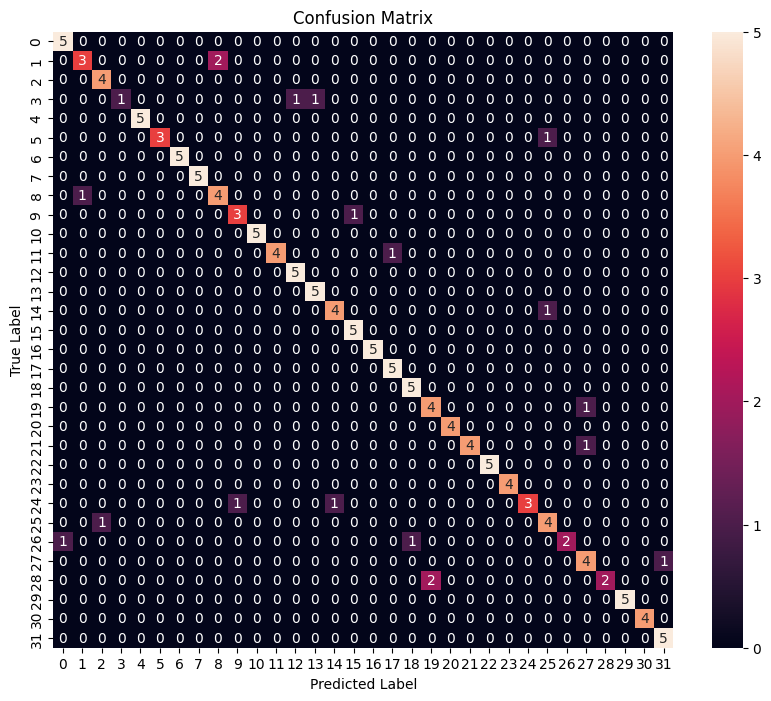

Accuracy: 1.0 0.8733333333333333


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

data_dir = 'dimension_reduced_data'

use_pca = True
use_lda = True

if use_pca and not use_lda:
    print('using pca model')

    X_train = np.load('dimension_reduced_data/X_train_pca.npy')
    X_val = np.load('dimension_reduced_data/X_val_pca.npy')
    # with open('dimension_reduced_data/pca_model.pkl', 'rb') as f:
    #     trained_model = pickle.load(f)

if use_lda and not use_pca:
    print('using lda model')

    X_train = np.load('dimension_reduced_data/X_train_lda.npy')
    X_val = np.load('dimension_reduced_data/X_val_lda.npy')
    # with open('dimension_reduced_data/lda_model.pkl', 'rb') as f:
    #     trained_model = pickle.load(f)

if use_pca and use_lda:
    print('using pca and lda model')

    X_train = np.load('dimension_reduced_data/X_train_pca_lda.npy')
    X_val = np.load('dimension_reduced_data/X_val_pca_lda.npy')
    # with open('dimension_reduced_data/pca_lda_model.pkl', 'rb') as f:
    #     trained_model = pickle.load(f)

y_train = np.load('dimension_reduced_data/y_train.npy')
y_val = np.load('dimension_reduced_data/y_val.npy')

print(X_train.shape)

param_grid = {
    'n_estimators': [50, 100, 200],  # Example values, should be expanded based on the specific problem
    'max_depth': [None, 10, 20, 30],  # Example values plus None
    'min_samples_split': [2, 5, 10],  # Example values
    'min_samples_leaf': [1, 2, 4],  # Example values
    'max_features': ['auto', 'sqrt', 'log2'],  # Example values
    'bootstrap': [True, False]  # Example values
}

rf = RandomForestClassifier()

# GridSearchCV can be used for hyperparameter tuning, similar to SVC
# model = GridSearchCV(rf, param_grid, cv=5, verbose=2)  # 5-fold cross-validation

model = RandomForestClassifier(n_estimators=100, random_state=42)  # Example values

model.fit(X_train, y_train)

yp_train = model.predict(X_train)
training_accuracy = accuracy_score(y_train, yp_train)

yp_val = model.predict(X_val)

cm = confusion_matrix(y_val, yp_val)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

validation_accuracy = accuracy_score(y_val, yp_val)

print("Accuracy:", training_accuracy, validation_accuracy)
